In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
def plot_frequency_components(data):
    fft = tf.signal.rfft(data)
    f_per_dataset = np.arange(0, len(fft))

    num_sample_days = len(data)
    num_days_per_year = 365.2524
    num_weeks_per_year = num_days_per_year/7
    num_years_per_dataset = num_sample_days/(num_days_per_year)

    f_per_year = f_per_dataset/num_years_per_dataset
    plt.step(f_per_year, np.abs(fft))
    plt.xscale("log")
    plt.ylim(0, 2)
    plt.xlim([0.1, max(plt.xlim())])
    plt.xticks(
        [1, 4, 12, 26.8, num_weeks_per_year, 3*num_weeks_per_year],
        labels=["1/year", "1/quarter", "1/month", "1/fortnight", "1/week","3/week"]
    )
    plt.grid()
    plt.rcParams["figure.figsize"] = (20,12)
    _ = plt.xlabel("Frequency (log scale)")

Metal device set to: Apple M2


2022-10-19 12:01:15.697584: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-19 12:01:15.697694: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


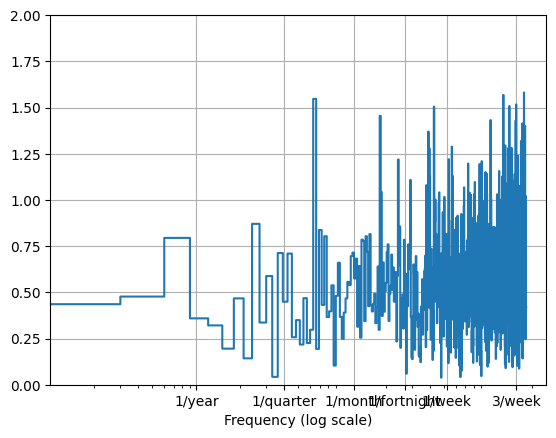

In [3]:
# Use all of the training+validation data to assess temporal feature importance.
# Arguably slightly cheats validation, but justifiable since all data would be
# used for final training before final testing.
train_df = pd.read_csv("data/train_data.csv")
val_df = pd.read_csv("data/validation_data.csv")
df = pd.concat([train_df, val_df])

data = df["log_returns_t"]
plot_frequency_components(data)

Notes:

- Year, month and quarter do not contribute major components
- Fortnightly, weekly, 3 times weekly periodicity looks important
- For fortnightly, a small adjustment was made from 26.08 to 26.8 to better fit the data
- Number of trading days per year (=252) also yielded no obvious component in this dataset